In [72]:
#import dependencies 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')



In [73]:
# read in CSVs for all availables years

raw_2010_economic_data = pd.read_csv('Machine_Learning_Dataset_2010.csv')
raw_2011_economic_data = pd.read_csv('Machine_Learning_Dataset_2011.csv')
raw_2012_economic_data = pd.read_csv('Machine_Learning_Dataset_2012.csv')
raw_2013_economic_data = pd.read_csv('Machine_Learning_Dataset_2013.csv')
raw_2014_economic_data = pd.read_csv('Machine_Learning_Dataset_2013.csv')
raw_2015_economic_data = pd.read_csv('Machine_Learning_Dataset_2015.csv')
raw_2016_economic_data = pd.read_csv('Machine_Learning_Dataset_2016.csv')
raw_2017_economic_data = pd.read_csv('Machine_Learning_Dataset_2017.csv')


In [74]:
# make a list of dataframes

df_list = [raw_2010_economic_data, 
           raw_2011_economic_data,
           raw_2012_economic_data,
           raw_2013_economic_data,
           raw_2014_economic_data,
           raw_2015_economic_data,
           raw_2016_economic_data,
           raw_2017_economic_data]


In [75]:
# loop through dataframes and drop columns with null values

for df in df_list:
    df.dropna(axis='columns', inplace=True)
    

In [76]:
# loop through dataframes and drop any irrelevant or problematic columns

for df in df_list:
    df.drop(["COU",
              "Country",
              "Literacy rate, adult total (% of people ages 15 and above)",
              "GINI index (World Bank estimate)_x",
              "Mortality Causes",
              "Year",
  #            "Negative affect",
  #            "Positive affect",
  #            "Delivery Quality",
  #            "Standard deviation of ladder by country-year",
              "Standard deviation/Mean of ladder by country-year"], 
              axis=1, inplace=True)
    

In [77]:
# concatenate the dataframes into one

unified_df = pd.concat([raw_2010_economic_data, 
                        raw_2011_economic_data,
                        raw_2012_economic_data,
                        raw_2013_economic_data,
                        raw_2014_economic_data,
                        raw_2015_economic_data,
                        raw_2016_economic_data,
                        raw_2017_economic_data], ignore_index=True)

unified_df.head()

,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Delivery Quality,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),"GINI index (World Bank estimate), average 2000-16",Generosity,Healthy life expectancy at birth,Life Ladder,Log GDP per capita,Negative affect,Perceptions of corruption,Population density (people per sq. km of land area),Positive affect,"Probability of dying at age 5-14 years (per 1,000 children age 5)",Social support,Standard deviation of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
0,52252.97944,1699.94,0.609753,1.815898,1.154313,0.932059,1.144260e+12,NaN,0.308317,72.199997,7.450047,10.632582,0.220073,0.366127,2.867859,0.834236,1.0,0.954520,1.737802,0.412946
1,50096.71444,1557.00,0.486447,1.670085,1.291470,0.895980,3.918930e+11,NaN,0.129112,71.400002,7.302679,10.676744,0.155793,0.546145,101.287430,0.814719,1.0,0.914193,1.753248,0.367440
2,50872.48700,1546.00,0.336516,1.445168,1.085667,0.806930,4.835480e+11,NaN,0.018613,70.800003,6.853514,10.623421,0.240364,0.697366,359.827807,0.828259,1.0,0.930570,1.603352,0.393781
3,45502.56024,1715.00,0.551076,1.838644,1.144457,0.933949,1.613460e+12,NaN,0.223002,72.199997,7.650346,10.613968,0.233113,0.412660,3.739510,0.878868,1.1,0.953765,1.749785,0.710133
4,24960.82175,2070.00,0.478706,1.385961,0.887607,0.786367,2.185380e+11,NaN,0.099339,68.900002,6.635656,9.875194,0.300117,0.701825,22.854905,0.809173,1.6,0.856955,2.183491,0.452482


In [78]:
unified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
Avg. Wages (Annual)                                                  215 non-null float64
Avg. Work Hours (Annual)                                             215 non-null float64
Confidence in national government                                    215 non-null float64
Delivery Quality                                                     215 non-null float64
Democratic Quality                                                   215 non-null float64
Freedom to make life choices                                         215 non-null float64
GDP (constant 2010 US$)                                              215 non-null float64
GINI index (World Bank estimate), average 2000-16                    5 non-null float64
Generosity                                                           182 non-null float64
Healthy life expectancy at birth                                     215 non-null float

In [79]:
# do another pass to drop null vaues

unified_df.dropna(axis='columns', inplace=True)
unified_df.head()


,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Delivery Quality,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),Healthy life expectancy at birth,Life Ladder,Log GDP per capita,Negative affect,Perceptions of corruption,Population density (people per sq. km of land area),Positive affect,"Probability of dying at age 5-14 years (per 1,000 children age 5)",Social support,Standard deviation of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
0,52252.97944,1699.94,0.609753,1.815898,1.154313,0.932059,1.144260e+12,72.199997,7.450047,10.632582,0.220073,0.366127,2.867859,0.834236,1.0,0.954520,1.737802,0.412946
1,50096.71444,1557.00,0.486447,1.670085,1.291470,0.895980,3.918930e+11,71.400002,7.302679,10.676744,0.155793,0.546145,101.287430,0.814719,1.0,0.914193,1.753248,0.367440
2,50872.48700,1546.00,0.336516,1.445168,1.085667,0.806930,4.835480e+11,70.800003,6.853514,10.623421,0.240364,0.697366,359.827807,0.828259,1.0,0.930570,1.603352,0.393781
3,45502.56024,1715.00,0.551076,1.838644,1.144457,0.933949,1.613460e+12,72.199997,7.650346,10.613968,0.233113,0.412660,3.739510,0.878868,1.1,0.953765,1.749785,0.710133
4,24960.82175,2070.00,0.478706,1.385961,0.887607,0.786367,2.185380e+11,68.900002,6.635656,9.875194,0.300117,0.701825,22.854905,0.809173,1.6,0.856955,2.183491,0.452482


In [80]:
# rename "Life Ladder" column as "Happiness Index"

renamed_unified_df = unified_df.rename(columns={"Life Ladder": "Happiness Index",
                                               "gini of household income reported in Gallup, by wp5-year": "Gini household income",
                                               "Population density (people per sq. km of land area)": "Population density",
                                               "Standard deviation of ladder by country-year": "Standard deviation of ladder",
                                               "Probability of dying at age 5-14 years (per 1,000 children age 5)": "Probability of dying at age 5-14"})



In [81]:
# random trees can't take floats, so I'm changing all data types to integer

rev_unified_df = renamed_unified_df.astype('int64')


In [82]:
# output this dataframe to CSV for use elsewhere

rev_unified_df.to_csv("econ_happy_data_allyears.csv", index=True, header=True)


In [83]:
# assign X (data) and y (target)

X = rev_unified_df.drop("Happiness Index", axis=1)
y = rev_unified_df["Happiness Index"]
print(X.shape, y.shape)


(215, 17) (215,)


In [84]:
# establish variable to hold feature names (the names of the remaining columns)

feature_names = X.columns


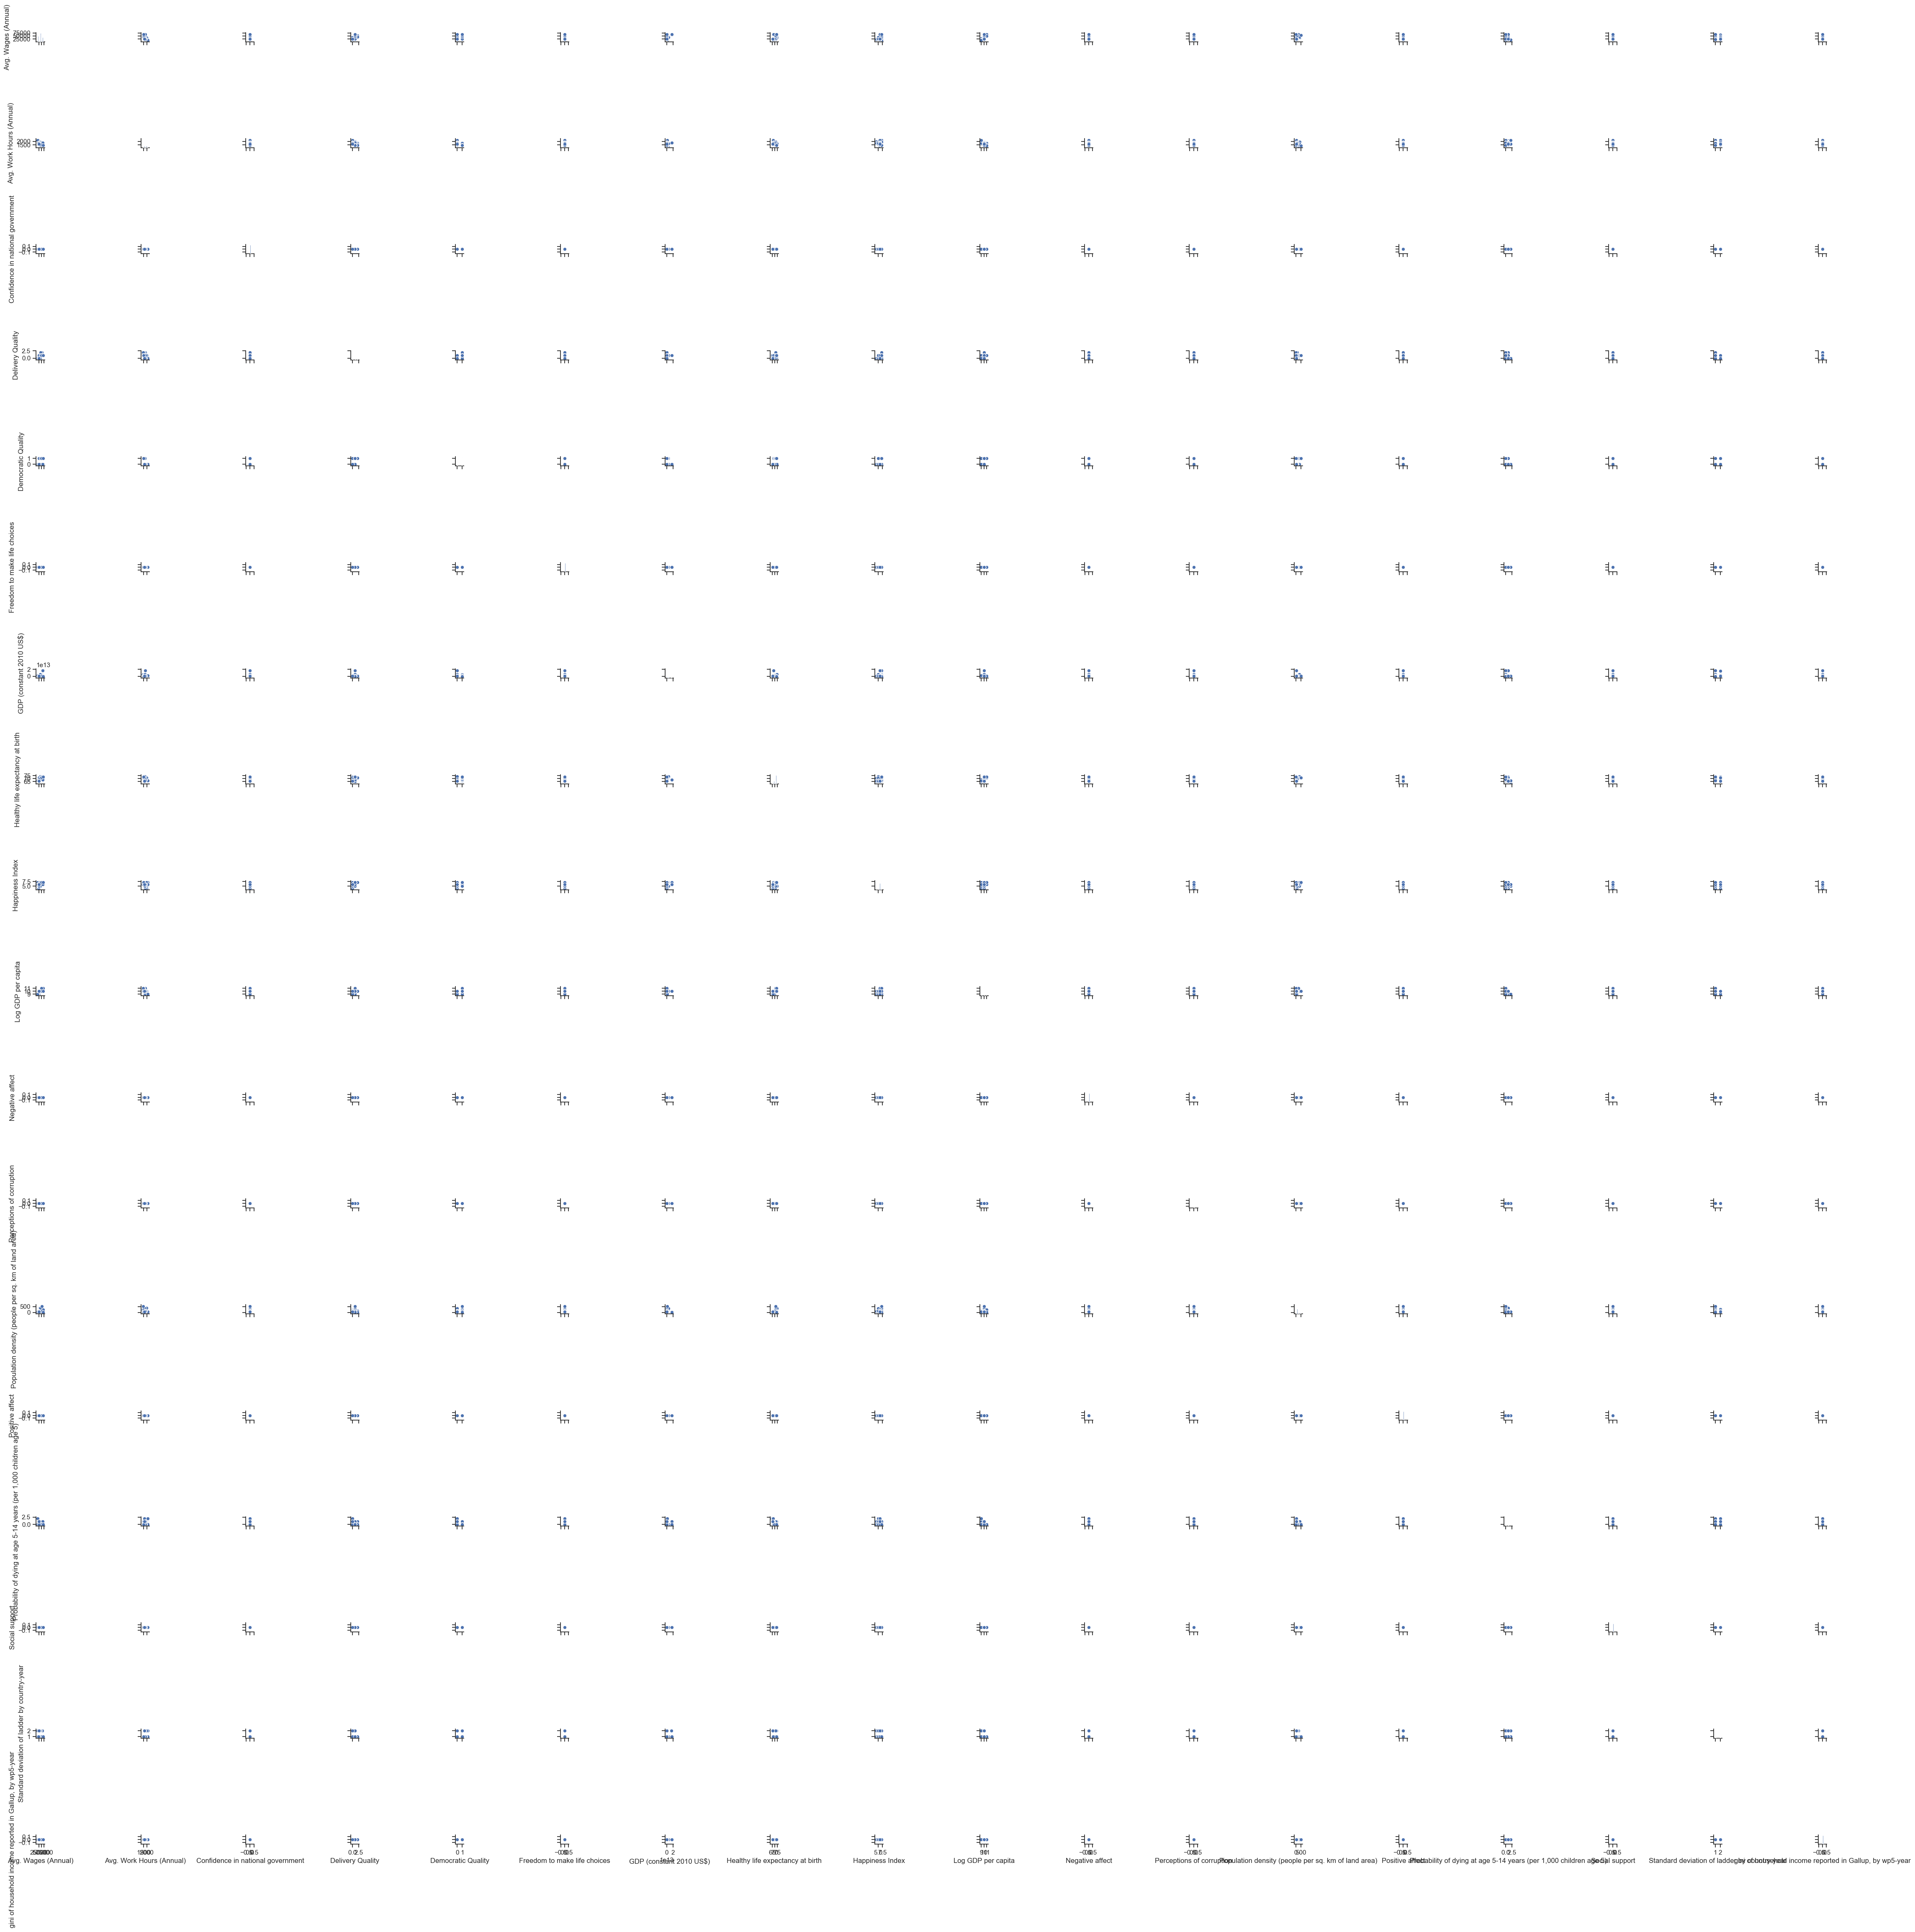

In [36]:
# visualize data prior to splitting

sns.pairplot(rev_unified_df)


In [85]:
# split data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [86]:
# create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8148148148148148

In [87]:
# calculate feature importance

importances = rf.feature_importances_
importances


array([0.20959953, 0.14224379, 0.        , 0.04632494, 0.07329527,
       0.        , 0.18480621, 0.09682702, 0.01778766, 0.        ,
       0.        , 0.18436417, 0.        , 0.01327278, 0.        ,
       0.03147863, 0.        ])

In [88]:
# sort the features by their importance

sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.2095995264457717, 'Avg. Wages (Annual)'),
 (0.18480620737608663, 'GDP (constant 2010 US$)'),
 (0.18436417384765916, 'Population density'),
 (0.14224379450161112, 'Avg. Work Hours (Annual)'),
 (0.09682701810427782, 'Healthy life expectancy at birth'),
 (0.0732952739468619, 'Democratic Quality'),
 (0.04632493529385267, 'Delivery Quality'),
 (0.03147862539555059, 'Standard deviation of ladder'),
 (0.017787663158866252, 'Log GDP per capita'),
 (0.013272781929462196, 'Probability of dying at age 5-14'),
 (0.0, 'Social support'),
 (0.0, 'Positive affect'),
 (0.0, 'Perceptions of corruption'),
 (0.0, 'Negative affect'),
 (0.0, 'Gini household income'),
 (0.0, 'Freedom to make life choices'),
 (0.0, 'Confidence in national government')]

In [89]:
# create feature importance df from which to sort and plot 

fi_df = pd.DataFrame(list(zip(feature_names, importances)), 
               columns =['Feature', 'Importance']) 

rev_fi_df = fi_df.sort_values(by=['Importance'], ascending=True)
                    
rev_fi_df
                    

,Feature,Importance
16,Gini household income,0.000000
14,Social support,0.000000
2,Confidence in national government,0.000000
12,Positive affect,0.000000
5,Freedom to make life choices,0.000000
10,Perceptions of corruption,0.000000
9,Negative affect,0.000000
13,Probability of dying at age 5-14,0.013273
8,Log GDP per capita,0.017788
15,Standard deviation of ladder,0.031479


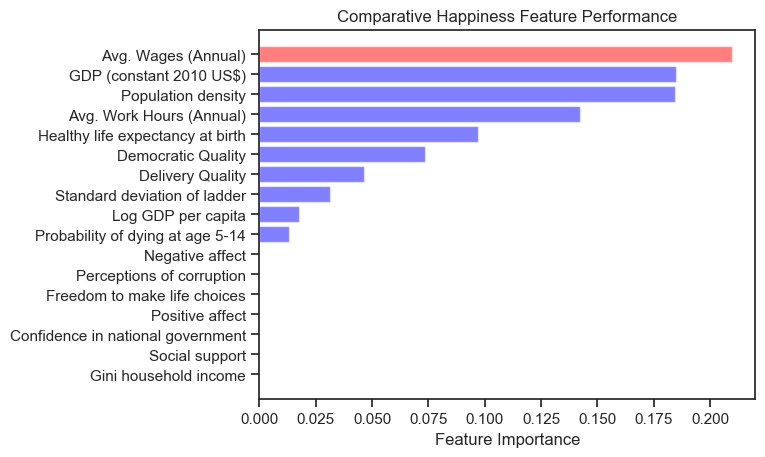

In [90]:
# plot feature importance 

objects = rev_fi_df['Feature']
y_pos = np.arange(len(objects))
importance = rev_fi_df['Importance']
colors = ['blue' if (x < max(importance)) else 'red' for x in importance]

plt.barh(y_pos, importance, align='center', alpha=0.5, color=colors)
plt.yticks(y_pos, objects)
plt.xlabel('Feature Importance')
plt.title('Comparative Happiness Feature Performance')
plt.savefig('random_forests_fi.png', bbox_inches='tight')
plt.show()
